In [25]:
import numpy as np
import h5py 
import sys
sys.path.append("../src")
from L_layer_model_03.L_layer_model import *

In [2]:
with h5py.File("../EIDSeg_Dataset/cache/eidseg_32x32_binary_any.h5", "r") as f:
    X_train_org = f["X_train"][:]
    Y_train_org = f["Y_train"][:]
    X_test_org  = f["X_test"][:]
    Y_test_org  = f["Y_test"][:]

m_train = X_train_org.shape[0]
m_test = X_test_org.shape[0]
num_px =X_train_org.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(X_train_org.shape))
print ("train_set_y shape: " + str(Y_train_org.shape))
print ("test_set_x shape: " + str(X_test_org.shape))
print ("test_set_y shape: " + str(Y_test_org.shape))

Number of training examples: m_train = 2612
Number of testing examples: m_test = 327
Height/Width of each image: num_px = 32
Each image is of size: (32, 32, 3)
train_set_x shape: (2612, 32, 32, 3)
train_set_y shape: (1, 2612)
test_set_x shape: (327, 32, 32, 3)
test_set_y shape: (1, 327)


In [3]:
with h5py.File("../EIDSeg_Dataset/cache//eidseg_32x32_binary_any_flat.h5", "r") as f:
    train_x = f["train_x"][:]   # (12288, m)
    train_y = f["train_y"][:]   # (1, m)
    test_x  = f["test_x"][:]    # (12288, m)
    test_y  = f["test_y"][:]    # (1, m)

print ("train_set_x flatten shape: " + str(train_x.shape))
print ("train_set_y shape: " + str(train_y.shape))
print ("test_set_x flatten shape: " + str(test_x.shape))
print ("test_set_y shape: " + str(test_y.shape))

train_set_x flatten shape: (3072, 2612)
train_set_y shape: (1, 2612)
test_set_x flatten shape: (3072, 327)
test_set_y shape: (1, 327)


## L-layer Neural Network


In [8]:

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False, X_test=None, Y_test=None):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    # np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.

    parameters = initialize_parameters_deep(layers_dims)

    # pos_weight = (Y.shape[1] - np.sum(Y)) / np.sum(Y)

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
                
        # Compute cost.
        
        # cost = compute_cost(AL, Y, pos_weight)
        cost = compute_cost(AL, Y)
            
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters.

        parameters = update_parameters(parameters, grads, learning_rate)
                        
        # Print the cost every 100 iterations and for the last iteration
        if print_cost and (i % 100 == 0 or i == num_iterations - 1):
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0:
            costs.append(cost)
    if X_test is not None and Y_test is not None:
        train_pred = predict(X, parameters)
        test_pred  = predict(X_test, parameters)
    
        train_acc = accuracy(train_pred, Y)
        test_acc  = accuracy(test_pred, Y_test)
    
        print(f"Final train accuracy: {train_acc*100:.2f}%")
        print(f"Final test accuracy:  {test_acc*100:.2f}%")

    
    return parameters, costs

In [5]:
layers_dims = [3072, 128, 64, 16, 1] 

X_gc = train_x[:, :5]
Y_gc = train_y[:, :5]

parameters = initialize_parameters_deep(layers_dims)
AL, caches = L_model_forward(X_gc, parameters)
grads = L_model_backward(AL, Y_gc, caches)

difference = gradient_check_L_layer(
    parameters,
    grads,
    X_gc,
    Y_gc,
    layers_dims
)


❌ Backprop error detected! difference = 2.7552063513895956e-07


In [10]:
layers_dims = [3072, 128, 64, 16, 1] 
parameters, costs = L_layer_model(train_x, train_y, layers_dims, learning_rate = 0.008,num_iterations = 1000, print_cost = True, X_test=test_x, Y_test=test_y)

Cost after iteration 0: 0.6932626070401304
Cost after iteration 100: 0.6485663890424451
Cost after iteration 200: 0.625385558196296
Cost after iteration 300: 0.6139014451100197
Cost after iteration 400: 0.6085862809650597
Cost after iteration 500: 0.6062741807646925
Cost after iteration 600: 0.6053137330532454
Cost after iteration 700: 0.6049278513489112
Cost after iteration 800: 0.604771128874362
Cost after iteration 900: 0.6047070304319869
Cost after iteration 999: 0.6046792814156225
Final train accuracy: 70.71%
Final test accuracy:  74.01%


# it's taking for ever to run and the data is not balanced so the model cheats and predicts all one's 

In [11]:
preds = predict(train_x, parameters)
print("Unique preds:", np.unique(preds, return_counts=True))


Unique preds: (array([1.]), array([2612]))


=== Model Evaluation Report ===


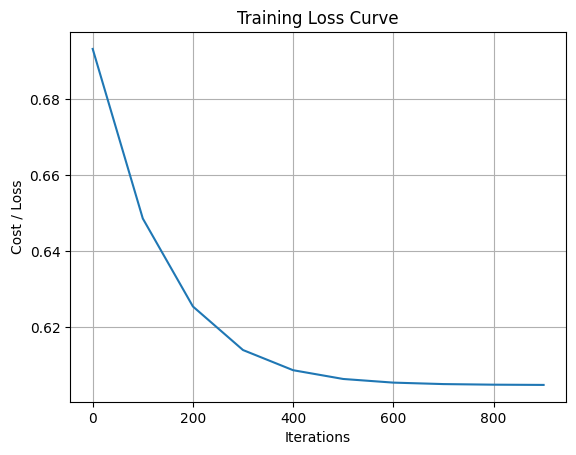

In [12]:
from eval_utils import *
from visualization import *

print_report(parameters)
plot_costs(costs)

# to test if the model is even learning in the first place i tried small set to se if it will overfit(learn):

In [13]:
k = 25  # or 10

train_x_tiny = train_x[:, :k]
train_y_tiny = train_y[:, :k]
test_y_tiny = test_y[:, :k]
test_x_tiny= test_x[:, :k]

In [15]:
layers_dims = [3072, 256, 64, 16, 1] 
parameters, costs = L_layer_model(train_x_tiny, train_y_tiny, layers_dims, learning_rate = 0.01,num_iterations = 800, print_cost = True, X_test=test_x_tiny , Y_test=test_y_tiny)


Cost after iteration 0: 0.6928087906901043
Cost after iteration 100: 0.3474443692825239
Cost after iteration 200: 0.2153443184342435
Cost after iteration 300: 0.17991535584305254
Cost after iteration 400: 0.17113027559012742
Cost after iteration 500: 0.16882489841258846
Cost after iteration 600: 0.1681747330434144
Cost after iteration 700: 0.16797310797536744
Cost after iteration 799: 0.1678957921874448
Final train accuracy: 9600.00%
Final test accuracy:  9600.00%


In [16]:
print("train_x_tiny:", train_x_tiny.shape)
print("train_y_tiny:", train_y_tiny.shape)
print("test_x_tiny:", test_x_tiny.shape)
print("test_y_tiny:", test_y_tiny.shape)

preds = predict(train_x_tiny, parameters)
print("Unique predictions:", np.unique(preds))


train_x_tiny: (3072, 25)
train_y_tiny: (1, 25)
test_x_tiny: (3072, 25)
test_y_tiny: (1, 25)
Unique predictions: [1.]


In [17]:
print("Train positives:", np.sum(train_y))
print("Train negatives:", train_y.shape[1] - np.sum(train_y))

print("Test positives:", np.sum(test_y))
print("Test negatives:", test_y.shape[1] - np.sum(test_y))


Train positives: 1847
Train negatives: 765
Test positives: 242
Test negatives: 85


you can see how much there is more y labeled 1
=================================

# Load balanced data set

In [18]:
with h5py.File("../EIDSeg_Dataset/cache//eidseg_32x32_destroyed_cov40_eliminated_flat.h5", "r") as f:
    train_x = f["train_x"][:]   # (12288, m)
    train_y = f["train_y"][:]   # (1, m)
    test_x  = f["test_x"][:]    # (12288, m)
    test_y  = f["test_y"][:]    # (1, m)

print ("train_set_x flatten shape: " + str(train_x.shape))
print ("train_set_y shape: " + str(train_y.shape))
print ("test_set_x flatten shape: " + str(test_x.shape))
print ("test_set_y shape: " + str(test_y.shape))

print("Train positives:", int(np.sum(train_y)))
print("Train negatives:", train_y.shape[1] - int(np.sum(train_y)))

print("Test positives:", int(np.sum(test_y)))
print("Test negatives:", test_y.shape[1] - int(np.sum(test_y)))


train_set_x flatten shape: (3072, 1671)
train_set_y shape: (1, 1671)
test_set_x flatten shape: (3072, 210)
test_set_y shape: (1, 210)
Train positives: 906
Train negatives: 765
Test positives: 125
Test negatives: 85


In [22]:
layers_dims = [3072, 256, 128, 16, 1] 
parameters, costs = L_layer_model(train_x, train_y, layers_dims, learning_rate = 0.01,num_iterations = 2500, print_cost = True, X_test=test_x, Y_test=test_y)

Cost after iteration 0: 0.6931747733964386
Cost after iteration 100: 0.6896992151902093
Cost after iteration 200: 0.6893160338989356
Cost after iteration 300: 0.6892346059081248
Cost after iteration 400: 0.6891880306491166
Cost after iteration 500: 0.6891396509218575
Cost after iteration 600: 0.6891093250461895
Cost after iteration 700: 0.6890846015303739
Cost after iteration 800: 0.6890624519196258
Cost after iteration 900: 0.6890374699778623
Cost after iteration 1000: 0.6890194773083292
Cost after iteration 1100: 0.6890036388403794
Cost after iteration 1200: 0.6889893856325117
Cost after iteration 1300: 0.6889761137838618
Cost after iteration 1400: 0.6889631302958511
Cost after iteration 1500: 0.6889466795114629
Cost after iteration 1600: 0.6889299726634636
Cost after iteration 1700: 0.6889159589253087
Cost after iteration 1800: 0.6889025214455936
Cost after iteration 1900: 0.6888890854911557
Cost after iteration 2000: 0.6888757534222039
Cost after iteration 2100: 0.6888622045685316


=== Model Evaluation Report ===


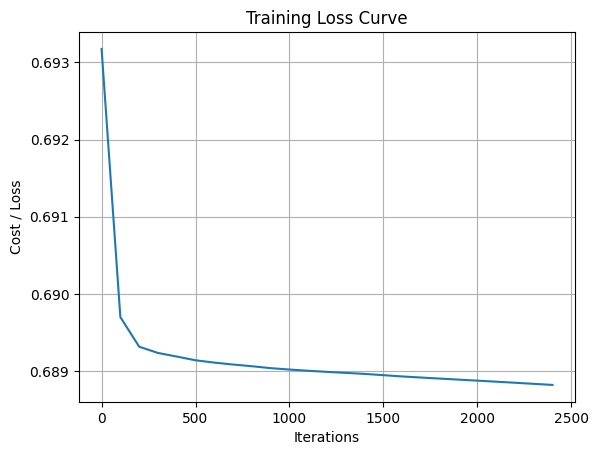

In [23]:
from eval_utils import *
from visualization import *

print_report(parameters)
plot_costs(costs)

In [24]:
preds = predict(train_x, parameters)
print("Unique preds:", np.unique(preds, return_counts=True))


Unique preds: (array([1.]), array([1671]))


## same damn problem i hate this
